<a href="https://colab.research.google.com/github/Mak7k/IST2/blob/main/%D0%98%D0%A1%D0%A22_%D0%90%D0%BD%D0%B4%D1%80%D1%83%D1%88%D0%BA%D0%B5%D0%B2%D0%B8%D1%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практика 2**
Выполнил студент группы ИНМО-01-25 Андрушкевич М.В.

Вариант: https://archive.ics.uci.edu/dataset/82/post+operative+patient

In [ ]:
# Блок 0: Установка необходимых библиотек
!pip install ucimlrepo umap-learn trimap pacmap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551516 sha256=081a74059b5140ee2e978d40da3095b0c44c67f6e982ff318d2be8e43e62e687
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [ ]:
# Блок 1: Импорт библиотек
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Блок 2: Загрузка датасета Post-Operative Patient
from ucimlrepo import fetch_ucirepo

# Загружаем датасет
post_operative = fetch_ucirepo(id=82)

# Извлекаем признаки и целевую переменную
X = post_operative.data.features
y = post_operative.data.targets

print("Форма данных X:", X.shape)
print("Форма данных y:", y.shape)
print("\nПервые 5 строк X:")
print(X.head())
print("\nЦелевая переменная:")
print(y.iloc[:, 0].value_counts())

Форма данных X: (90, 8)
Форма данных y: (90, 1)

Первые 5 строк X:
  L-CORE L-SURF       L-O2  L-BP SURF-STBL CORE-STBL     BP-STBL  COMFORT
0    mid    low  excellent   mid    stable    stable      stable     15.0
1    mid   high  excellent  high    stable    stable      stable     10.0
2   high    low  excellent  high    stable    stable  mod-stable     10.0
3    mid    low       good  high    stable  unstable  mod-stable     15.0
4    mid    mid  excellent  high    stable    stable      stable     10.0

Целевая переменная:
ADM-DECS
A     63
S     24
I      2
A      1
Name: count, dtype: int64


In [ ]:
# Блок 3: Предобработка данных
print("Пропущенные значения в X:")
print(X.isnull().sum())

# Заполнение пропусков
for col in X.columns:
    if X[col].isnull().sum() > 0:
        X[col] = X[col].fillna(X[col].mode()[0])

# Кодируем категориальные признаки
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Кодируем целевую переменную
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y.iloc[:, 0])
print("Закодированные метки классов:", le_target.classes_)

Пропущенные значения в X:
L-CORE       0
L-SURF       0
L-O2         0
L-BP         0
SURF-STBL    0
CORE-STBL    0
BP-STBL      0
COMFORT      3
dtype: int64
Закодированные метки классов: ['A' 'A ' 'I' 'S']


In [ ]:
# Блок 4: Функции для визуализации
def plot_embedding(embedding, labels, title):
    """Функция для отрисовки 2D вложения"""
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

def apply_tsne(data, n_components=2, **params):
    """Применение t-SNE"""
    tsne = TSNE(n_components=n_components, random_state=42, **params)
    return tsne.fit_transform(data)

def apply_umap(data, n_components=2, **params):
    """Применение UMAP"""
    reducer = umap.UMAP(n_components=n_components, random_state=42, **params)
    return reducer.fit_transform(data)

def apply_trimap(data, n_components=2, **params):
    """Применение TriMAP"""
    reducer = trimap.TRIMAP(n_dims=n_components, **params)
    return reducer.fit_transform(data)

def apply_pacmap(data, n_components=2, **params):
    """Применение PaCMAP"""
    reducer = pacmap.PaCMAP(n_components=n_components, **params)
    return reducer.fit_transform(data)

In [ ]:
# Блок 5: Масштабирование данных
# MinMax Scaler
scaler_minmax = preprocessing.MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

# Standard Scaler
scaler_standard = preprocessing.StandardScaler()
X_standard = scaler_standard.fit_transform(X)

# Robust Scaler
scaler_robust = preprocessing.RobustScaler()
X_robust = scaler_robust.fit_transform(X)

print("Формы после масштабирования:")
print("MinMax:", X_minmax.shape)
print("Standard:", X_standard.shape)
print("Robust:", X_robust.shape)

Формы после масштабирования:
MinMax: (90, 8)
Standard: (90, 8)
Robust: (90, 8)


=== t-SNE с разными параметрами ===
Количество образцов в данных: 90


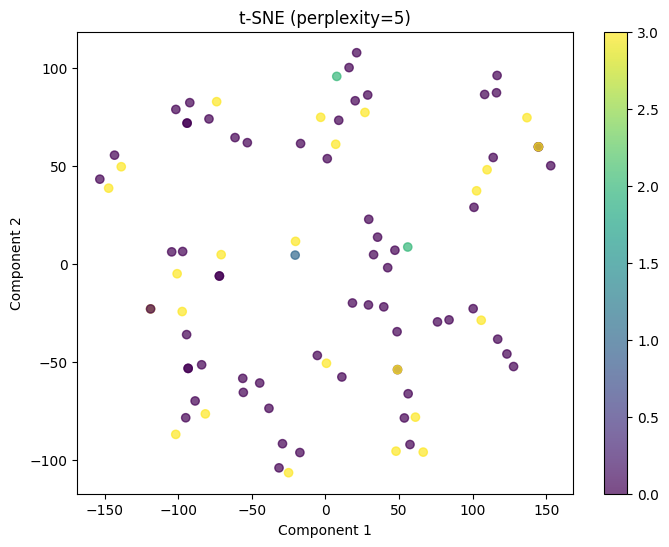

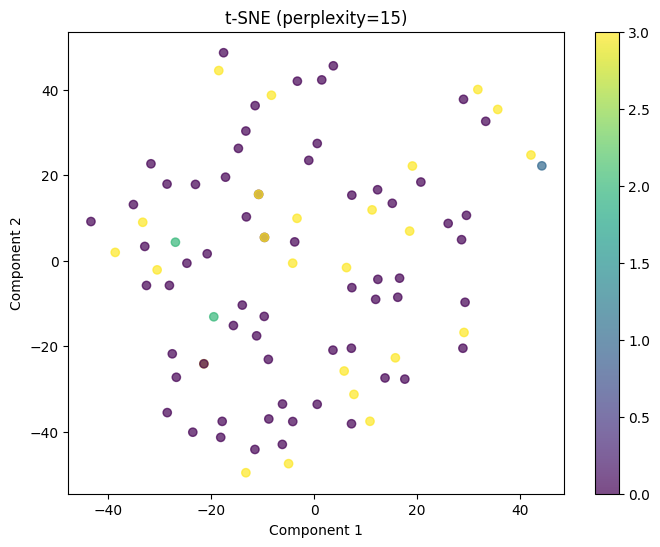

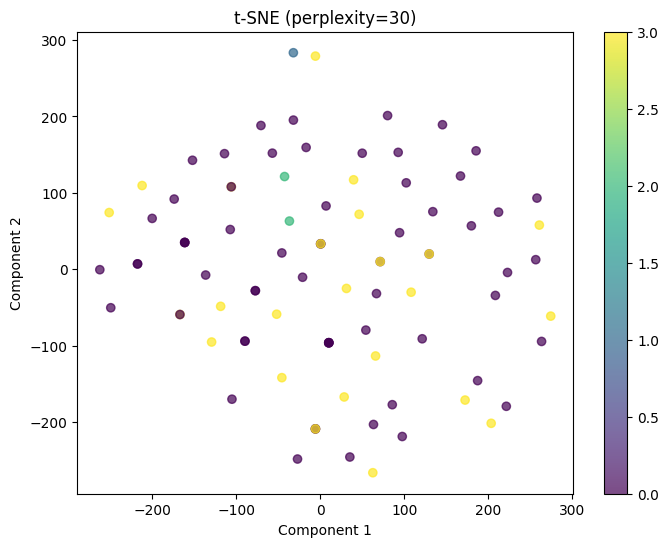

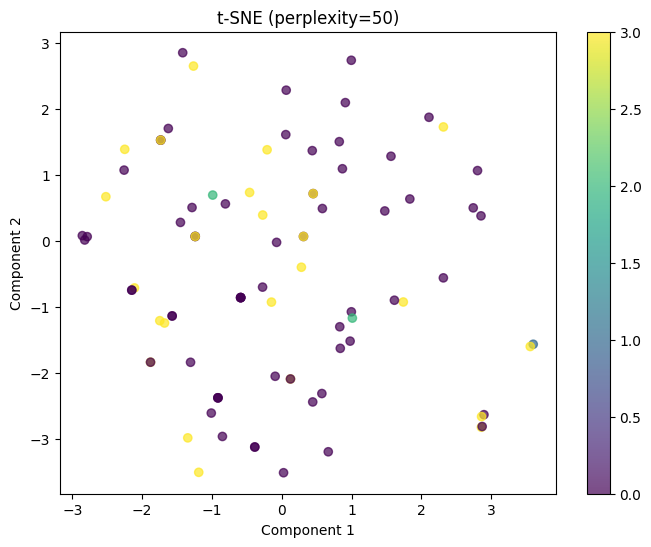

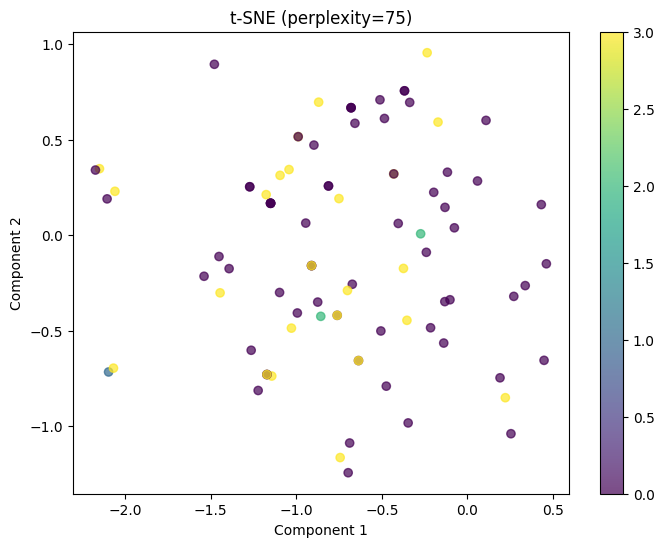

In [ ]:
# Блок 6: t-SNE с разными параметрами
print("=== t-SNE с разными параметрами ===")

n_samples = X_standard.shape[0]
print(f"Количество образцов в данных: {n_samples}")

perplexities = [5, 15, 30, 50, 75, 100]
perplexities = [p for p in perplexities if p < n_samples] #чтобы perplexity был не больше n_samples-1

for perplexity in perplexities:
    embedding = apply_tsne(X_standard, perplexity=perplexity)
    plot_embedding(embedding, y_encoded, f't-SNE (perplexity={perplexity})')

=== UMAP с разными параметрами ===


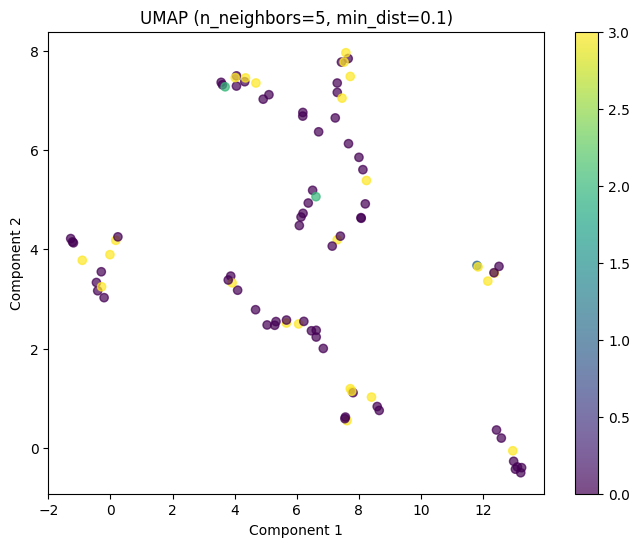

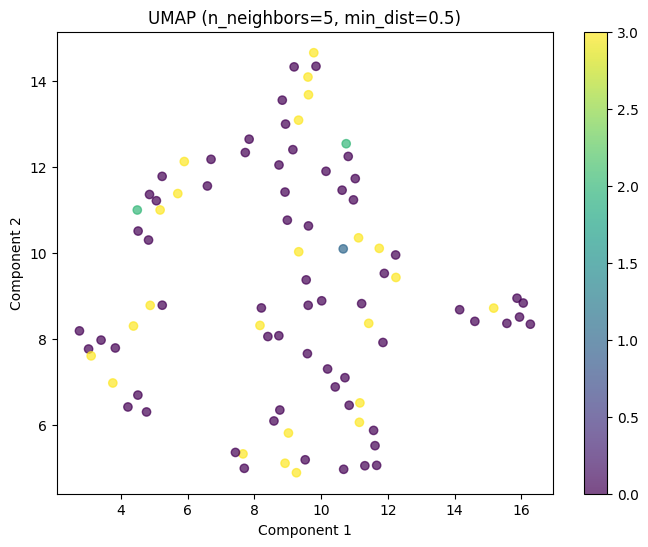

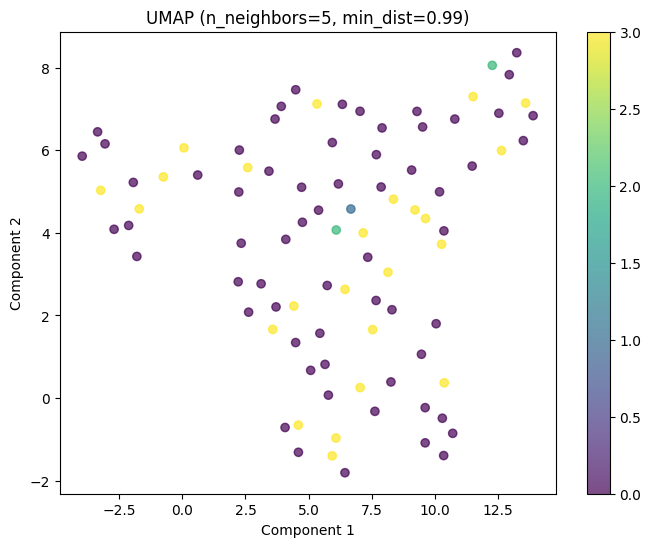

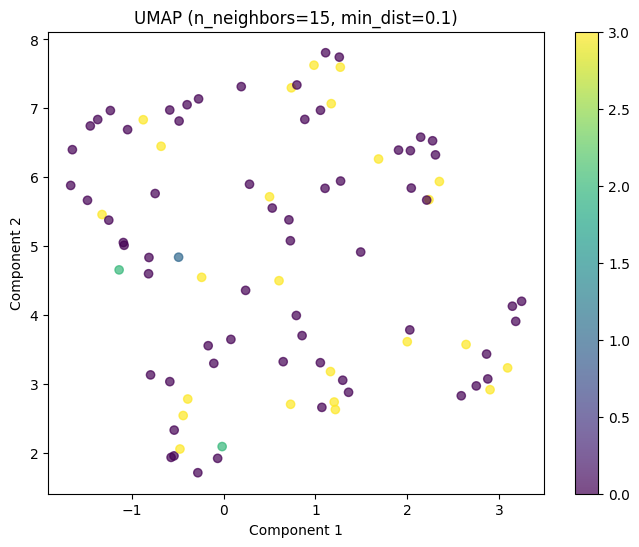

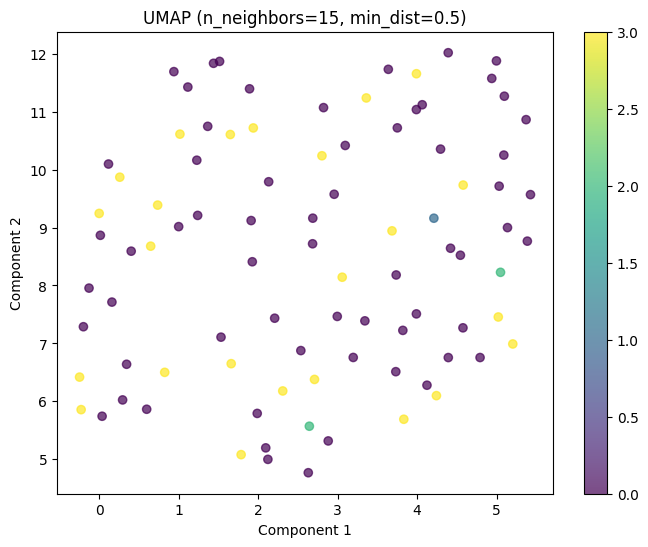

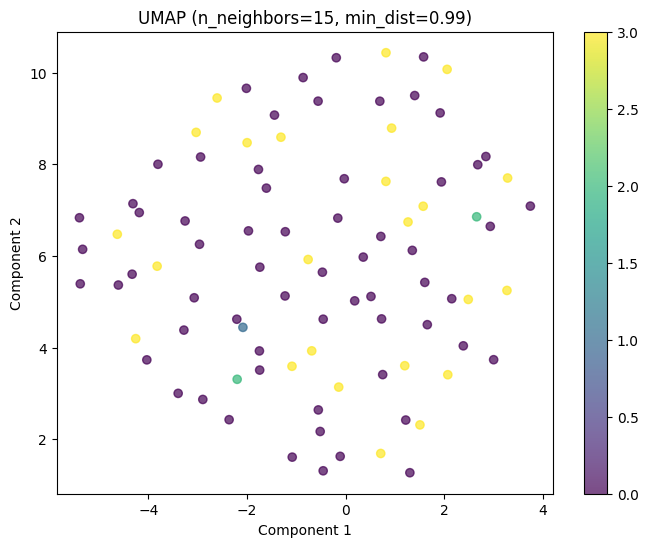

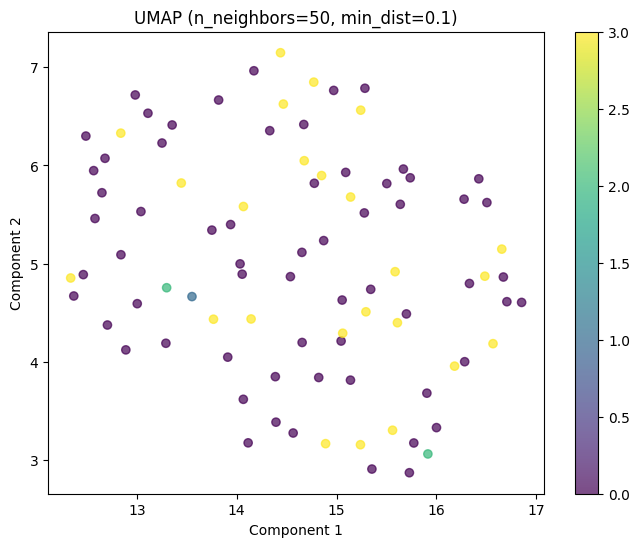

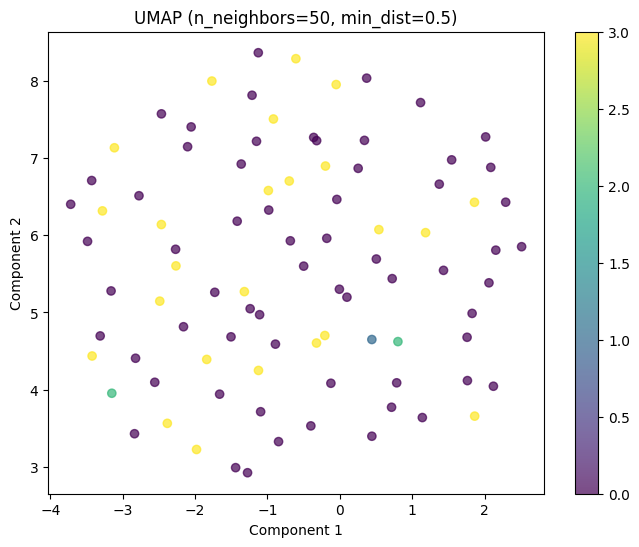

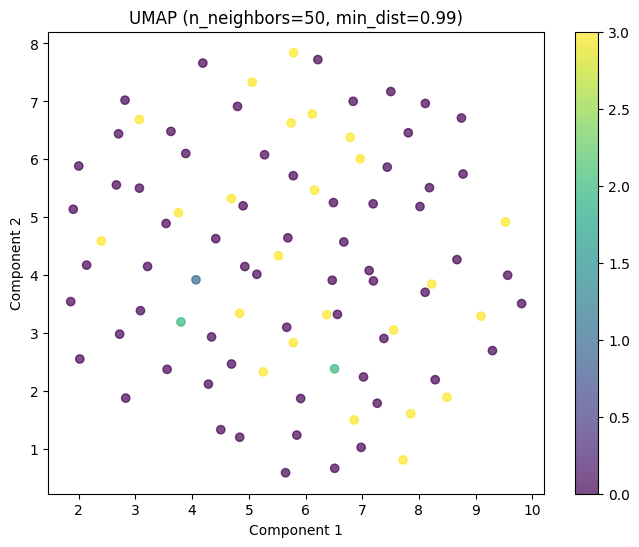

In [ ]:
# Блок 7: UMAP с разными параметрами
print("=== UMAP с разными параметрами ===")

n_neighbors_list = [5, 15, 50]
min_dist_list = [0.1, 0.5, 0.99]

for n_neighbors in n_neighbors_list:
    for min_dist in min_dist_list:
        embedding = apply_umap(X_standard, n_neighbors=n_neighbors, min_dist=min_dist)
        plot_embedding(embedding, y_encoded, f'UMAP (n_neighbors={n_neighbors}, min_dist={min_dist})')

=== TriMAP ===


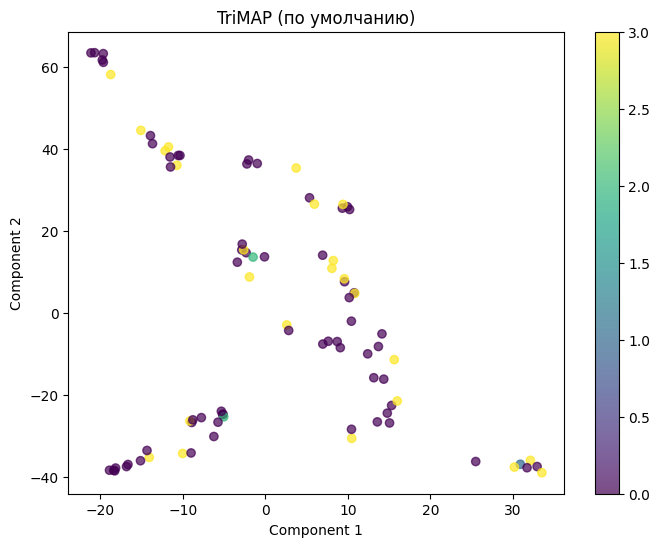

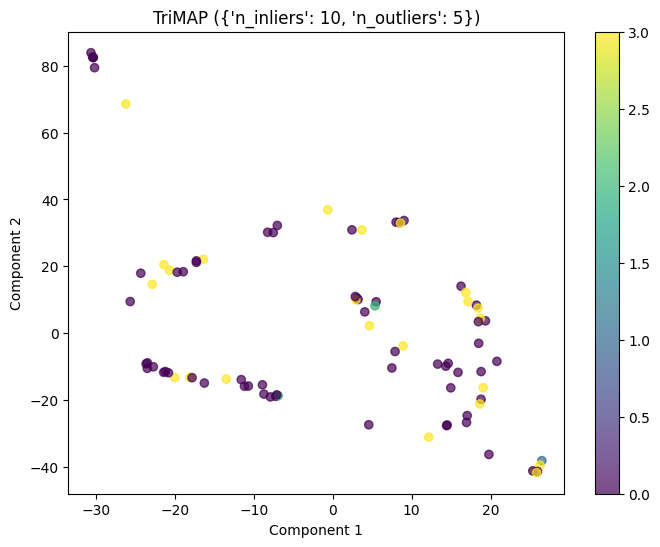

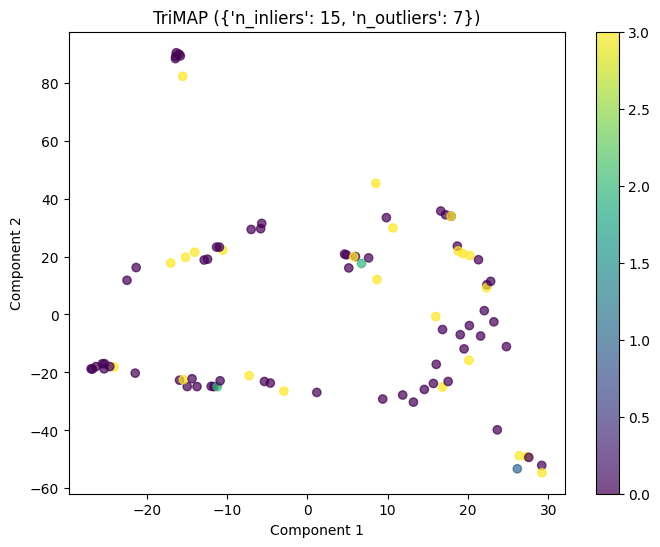

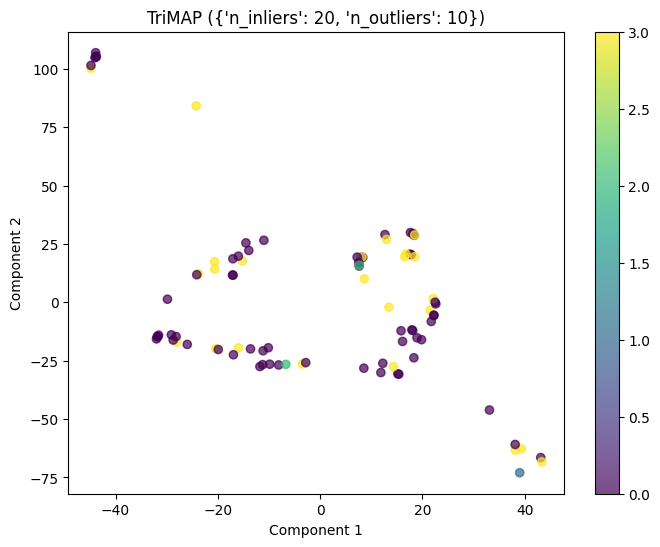

In [ ]:
# Блок 8: TriMAP (исп)
try:
    import trimap
    print("=== TriMAP ===")

    def apply_trimap(data, **params):
        reducer = trimap.TRIMAP(n_dims=2, **params)
        return reducer.fit_transform(data)

    # Параметры по умолчанию
    embedding = apply_trimap(X_standard)
    plot_embedding(embedding, y_encoded, 'TriMAP (по умолчанию)')

    # Несколько вариантов параметров (адаптированные под маленький датасет)
    n_samples = X_standard.shape[0]
    param_combinations = [
        {'n_inliers': 10, 'n_outliers': 5},
        {'n_inliers': 15, 'n_outliers': 7},
        {'n_inliers': 20, 'n_outliers': 10}
    ]

    # Проверяем, что параметры не слишком большие
    param_combinations = [params for params in param_combinations
                         if params['n_inliers'] + params['n_outliers'] < n_samples]

    for params in param_combinations:
        embedding = apply_trimap(X_standard, **params)
        plot_embedding(embedding, y_encoded, f'TriMAP ({params})')

except ImportError:
    print("TriMAP не установлен, пропускаем")

=== PaCMAP ===


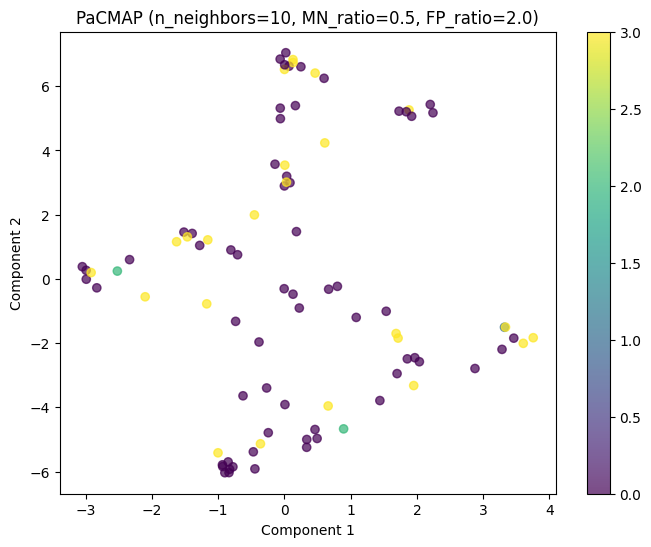

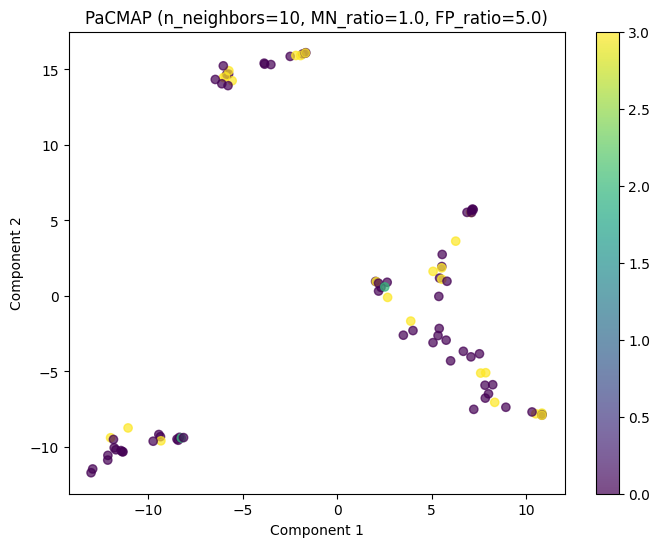

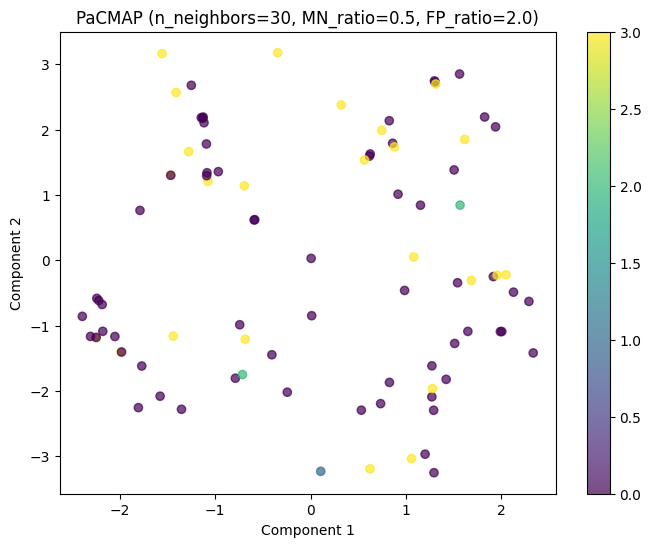

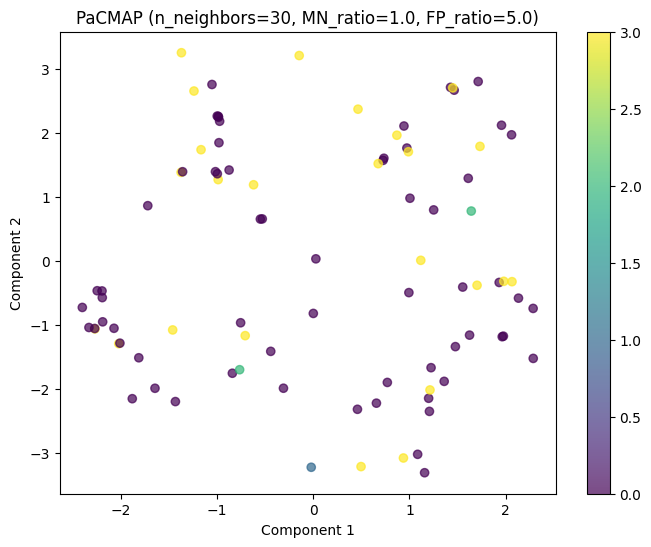

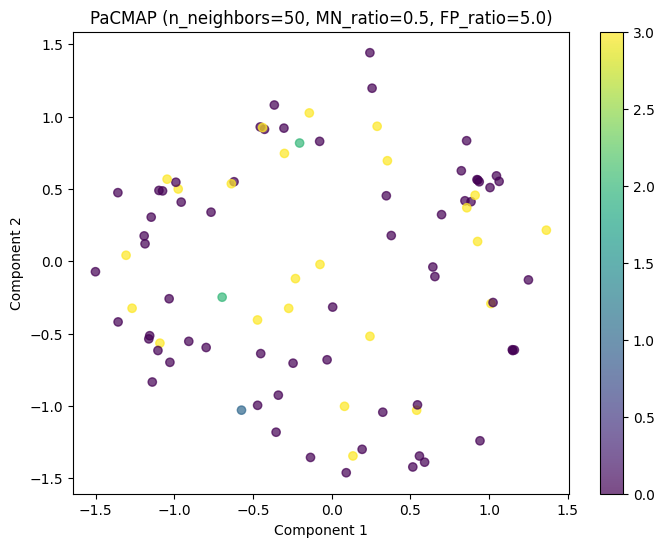

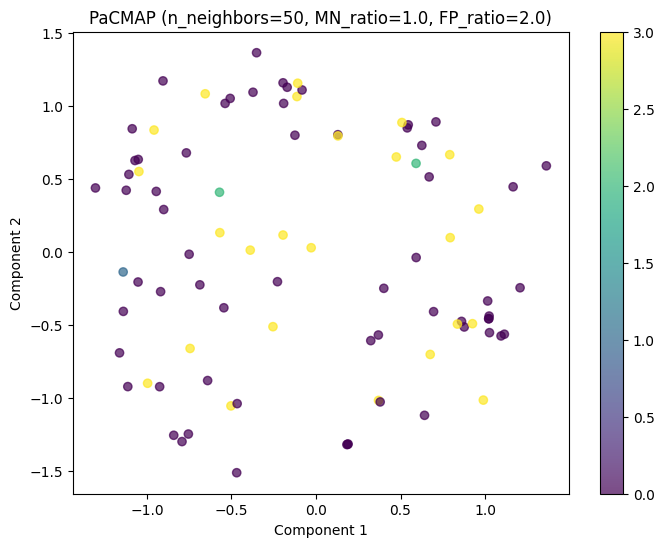

In [ ]:
# Блок 9: PaCMAP с разными параметрами
import pacmap
print("=== PaCMAP ===")

n_neighbors_list = [10, 30, 50]
MN_ratio_list = [0.5, 1.0]
FP_ratio_list = [2.0, 5.0]

# 6 комбинаций
combinations = [(10, 0.5, 2.0), (10, 1.0, 5.0), (30, 0.5, 2.0),
                (30, 1.0, 5.0), (50, 0.5, 5.0), (50, 1.0, 2.0)]

for n_neighbors, MN_ratio, FP_ratio in combinations:
    embedding = apply_pacmap(X_standard, n_neighbors=n_neighbors,
                           MN_ratio=MN_ratio, FP_ratio=FP_ratio)
    plot_embedding(embedding, y_encoded,
                  f'PaCMAP (n_neighbors={n_neighbors}, MN_ratio={MN_ratio}, FP_ratio={FP_ratio})')

=== Сравнение масштабирований (на примере UMAP) ===


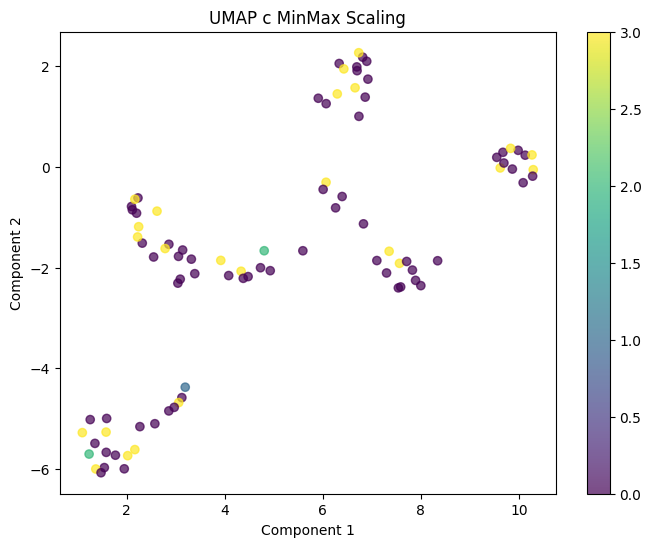

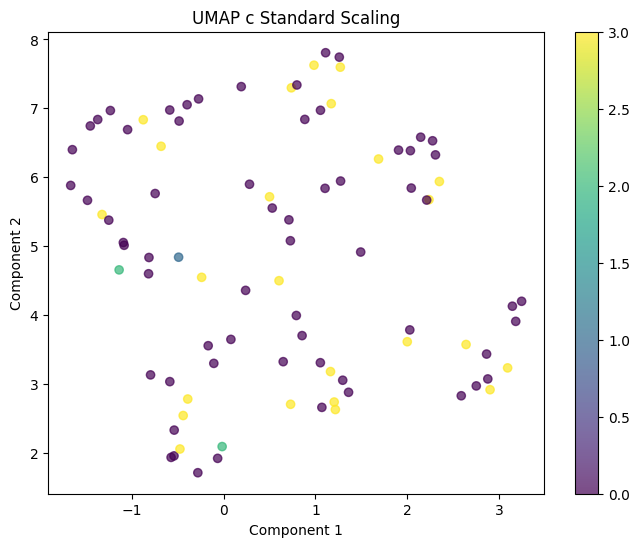

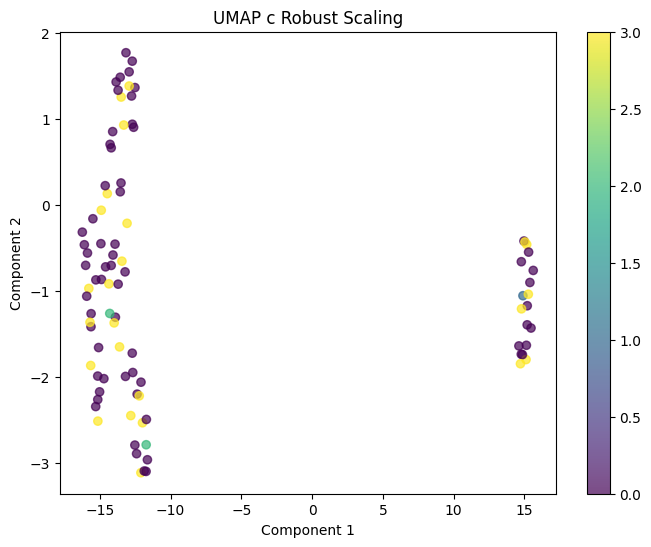

In [ ]:
# Блок 10: Сравнение масштабирований для одного алгоритма
print("=== Сравнение масштабирований (на примере UMAP) ===")

scalers = {
    'MinMax': X_minmax,
    'Standard': X_standard,
    'Robust': X_robust
}

for scaler_name, data_scaled in scalers.items():
    embedding = apply_umap(data_scaled, n_neighbors=15, min_dist=0.1)
    plot_embedding(embedding, y_encoded, f'UMAP с {scaler_name} Scaling')

## АНАЛИЗ РЕЗУЛЬТАТОВ
### 1. Сравнение алгоритмов снижения размерности

- **t-SNE** — хорошо выделяет локальные кластеры, но может искажать глобальную структуру данных.  
- **UMAP** — обеспечивает баланс между локальной и глобальной структурой, при этом работает быстрее, чем t-SNE.  
- **TriMAP** — основан на тройках точек, что помогает лучше сохранять глобальные расстояния.  
- **PaCMAP** — специально разработан для визуализации, хорошо сохраняет структуру данных даже при сильном сжатии.

---

### 2. Влияние параметров

- **perplexity (t-SNE)** — управляет размером и четкостью кластеров.  
- **n_neighbors (UMAP / PaCMAP)** — определяет масштаб структуры, которую алгоритм старается сохранить.  
- **min_dist (UMAP)** — влияет на плотность упаковки точек в проекции (меньше — плотнее кластеры).

---

### 3. Влияние масштабирования данных

- **StandardScaler** — обычно лучший выбор для алгоритмов, основанных на расстояниях.  
- **MinMaxScaler** — может быть чувствителен к выбросам.  
- **RobustScaler** — устойчив к выбросам, но может терять часть информации о распределении данных.

---

*Вывод:* оптимальные результаты достигаются при подборе параметров и масштабировании под конкретные данные. Для большинства случаев UMAP или PaCMAP дают более стабильное и интерпретируемое представление по сравнению с t-SNE.


=== ВИЗУАЛИЗАЦИЯ 3D ОБЪЕКТА ===
Форма данных мамонта: (999778, 3)
Первые 5 строк:
        x        y       z
0  58.823  228.407  79.843
1  59.197  228.642  77.478
2  58.734  228.931  78.515
3  59.043  228.693  78.571
4  59.223  228.667  78.611


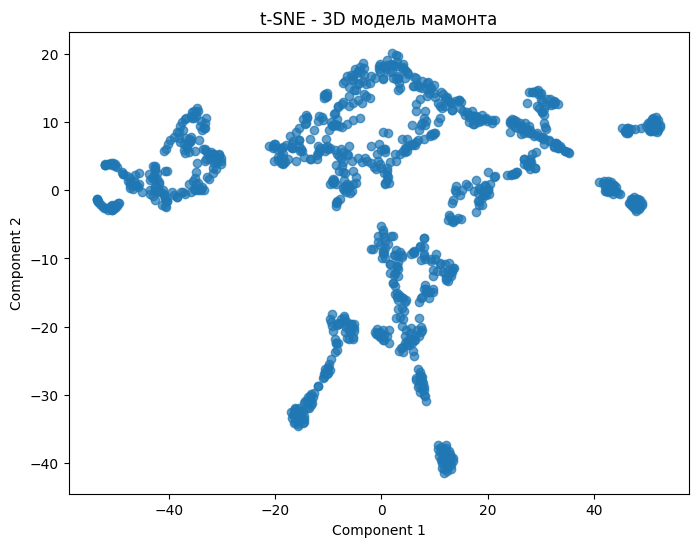

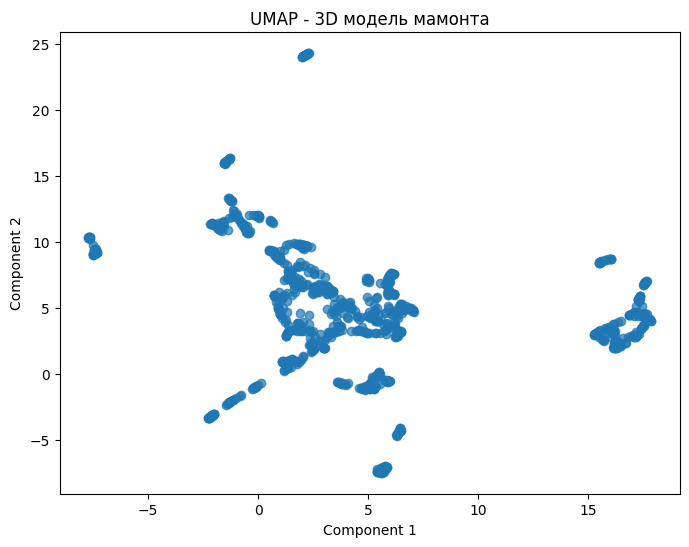

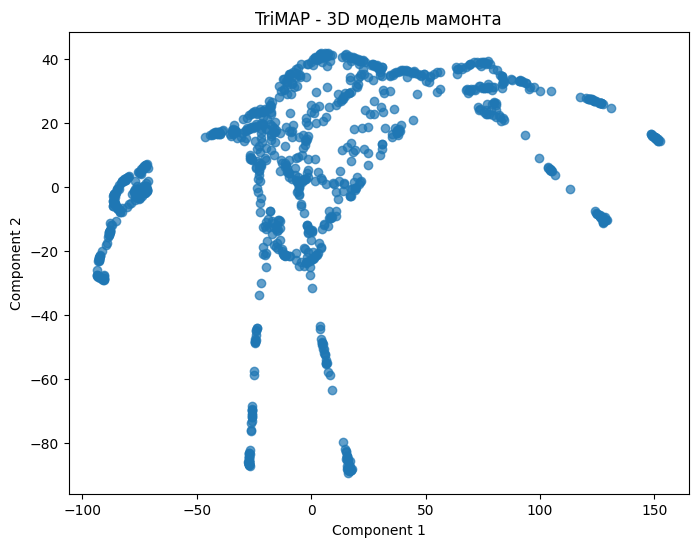

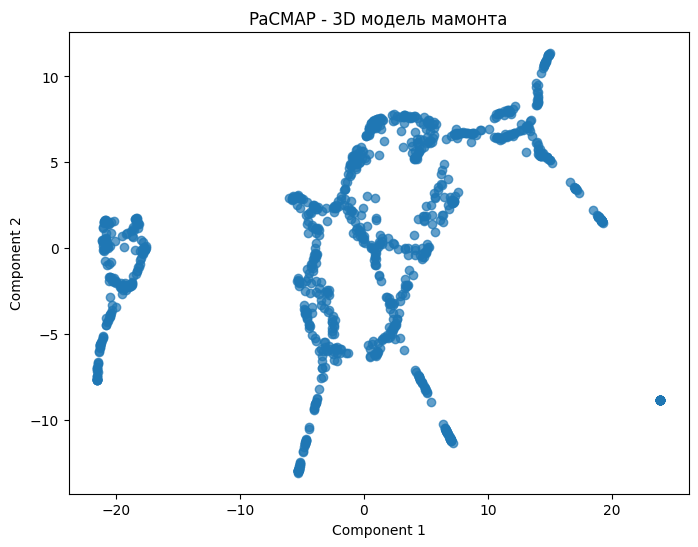

In [ ]:
# Блок 12: Визуализация 3D объекта (mammoth.csv)
print("=== ВИЗУАЛИЗАЦИЯ 3D ОБЪЕКТА ===")

try:
    # Загрузка данных мамонта
    mammoth_data = pd.read_csv('../content/mammoth.csv')
    print("Форма данных мамонта:", mammoth_data.shape)
    print("Первые 5 строк:")
    print(mammoth_data.head())

    mammoth_sample = mammoth_data.sample(n=1000, random_state=42)

    # Применение алгоритмов к 3D данным
    algorithms = {
        't-SNE': apply_tsne,
        'UMAP': apply_umap,
        'TriMAP': apply_trimap,
        'PaCMAP': apply_pacmap
    }

    for name, algorithm in algorithms.items():
        embedding = algorithm(mammoth_sample.values)
        plt.figure(figsize=(8, 6))
        plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.7)
        plt.title(f'{name} - 3D модель мамонта')
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.show()

except FileNotFoundError:
    print("Файл mammoth.csv не найден по пути 'content/mammoth.csv'")
    print("Убедитесь, что файл находится в указанной директории")